In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [3]:
#getting the data from the mat file
df=scipy.io.loadmat('C:/Users/prabh/Downloads/Competition_train.mat/Competition_train.mat')

#here we can observe that matfile is loaded into dict file
#get the values from the X labels and Y labels 
x = df.get('X')
y1= df.get('Y')

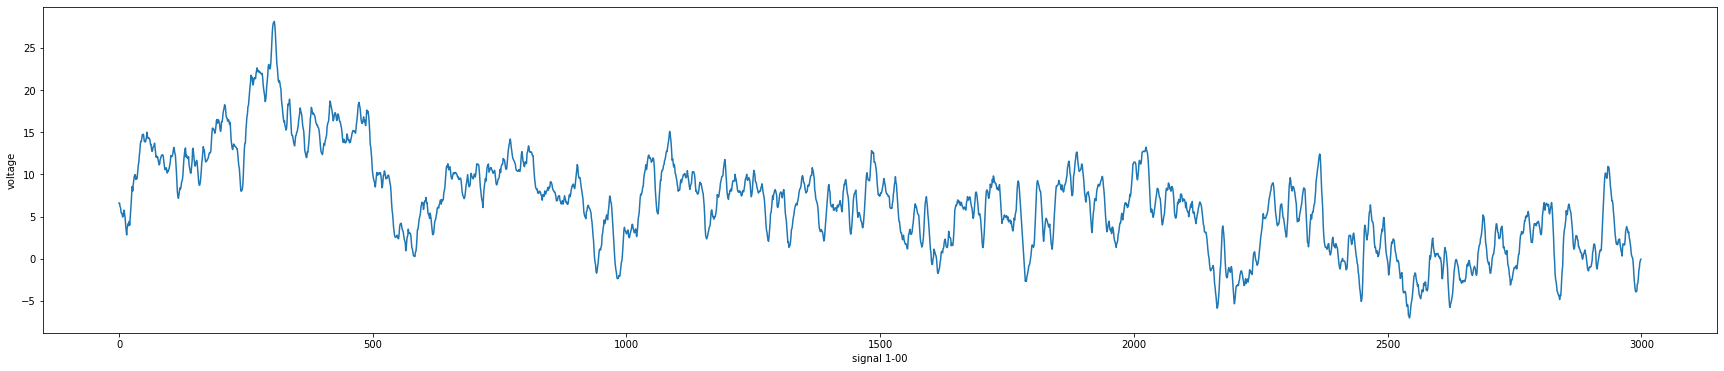

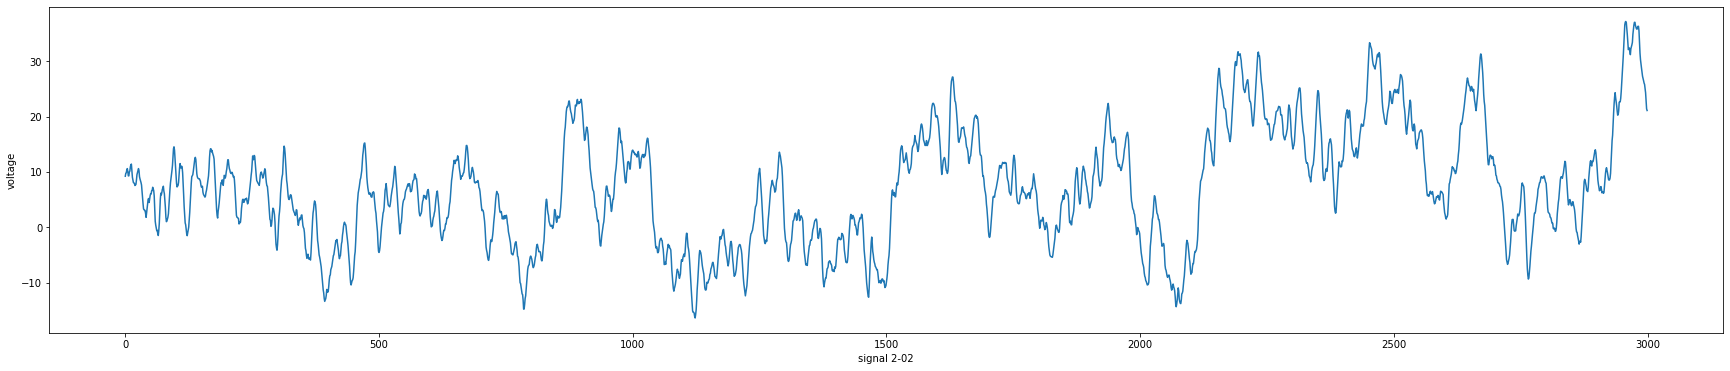

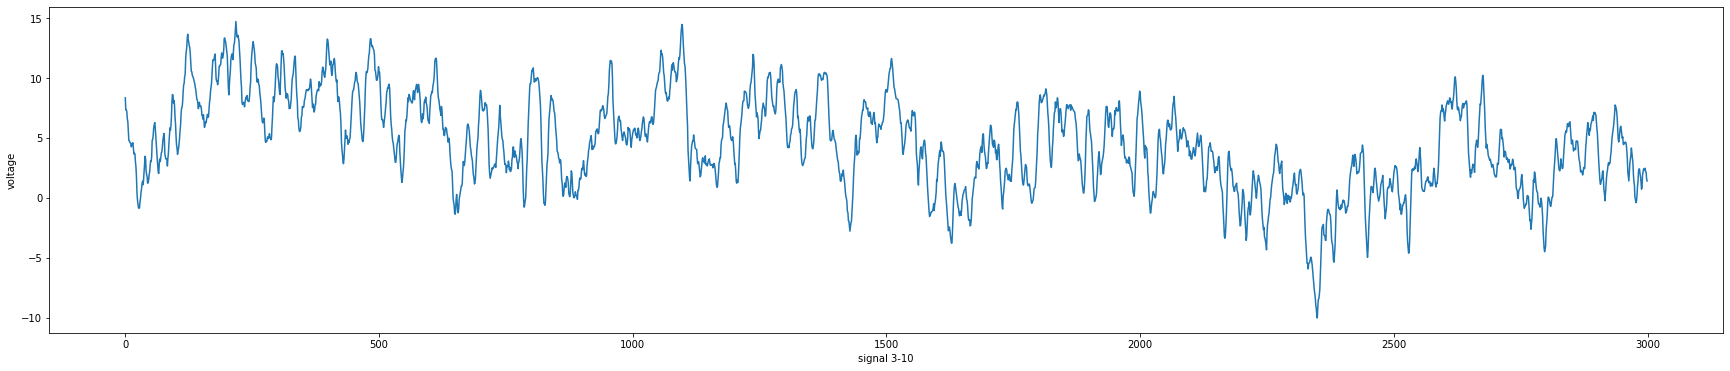

In [25]:
plt.figure(figsize=(30,6))
plt.plot(np.arange(0,3000, 1),x[0][0])
plt.ylabel('voltage')
plt.xlabel('signal 1-00')
plt.show()

plt.figure(figsize=(30,6))
plt.plot(np.arange(0,3000, 1),x[0][2])
plt.ylabel('voltage')
plt.xlabel('signal 2-02')
plt.show()

plt.figure(figsize=(30,6))
plt.plot(np.arange(0,3000, 1),x[1][0])
plt.ylabel('voltage')
plt.xlabel('signal 3-10')
plt.show()


In [5]:
data_x=[]
for i in range(0,278):
    for j in range(0,64):
        data_x.append(x[i][j])

# converting the nd array into list for converting it into pandas dataframe - .csv file
mylist_try= []
for i in range(17792):
    mylist_try.append(data_x[i].tolist())
    

In [18]:
#Working on data_labels
label_data =[]
for i in range(0,278):
    label_data.append(y1[i][0])
    
mylist_y = []
for j in range(0,278):
    for i in range(0,64):
        mylist_y.append(label_data[j])

In [28]:
#here converting into .csv file
lol = pd.DataFrame(mylist_try, mylist_y)
lol.to_csv('D:/Mtech-SemII/Major Project/BCI_train_3.csv')

In [2]:
#reading .csv file
eeg_data = pd.read_csv('D:/Mtech-SemII/Major Project/BCI_train_3.csv')


In [3]:
eeg_data.head()

,class,0,1,2,3,4,5,6,7,8,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,-1,6.59375,6.59375,6.18750,6.03125,5.50000,5.37500,5.37500,4.93750,5.06250,...,-3.90625,-3.84375,-3.00000,-2.93750,-2.31250,-1.43750,-1.09375,-0.46875,-0.21875,-0.06250
1,-1,-6.12500,-6.06250,-5.40625,-5.25000,-4.65625,-4.34375,-4.12500,-4.09375,-4.25000,...,4.71875,4.43750,4.09375,4.28125,3.09375,2.43750,1.96875,1.34375,0.15625,0.65625
2,-1,9.21875,9.75000,9.84375,10.40625,10.59375,10.06250,9.28125,9.28125,9.96875,...,27.28125,26.90625,26.50000,26.06250,25.81250,25.09375,24.31250,22.81250,21.40625,21.09375
3,-1,-39.34375,-39.62500,-39.46875,-39.84375,-40.56250,-40.65625,-41.15625,-41.43750,-40.46875,...,-20.12500,-19.81250,-19.65625,-19.56250,-19.81250,-20.00000,-20.12500,-20.75000,-21.06250,-21.18750
4,-1,-33.06250,-31.93750,-30.40625,-29.65625,-29.81250,-29.96875,-31.18750,-32.46875,-32.68750,...,6.12500,6.37500,6.03125,6.21875,6.21875,6.03125,6.50000,6.21875,5.87500,5.87500


In [4]:
eeg_data.dtypes

class      int64
0        float64
1        float64
2        float64
3        float64
          ...   
2995     float64
2996     float64
2997     float64
2998     float64
2999     float64
Length: 3001, dtype: object

In [5]:
Y=eeg_data.iloc[:,0].values

In [6]:
X=eeg_data.iloc[:,1:3001].values

In [7]:
#splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size =0.2)


In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [54]:
def models(X_train, Y_train):
    
    #use logistic regression
    from sklearn.linear_model import LogisticRegression
    log  = LogisticRegression(random_state= 0) 
    log.fit(X_train, Y_train)
    
    #use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski', p =2)
    knn.fit(X_train, Y_train)
    
    #use SVC (linear model)
    from sklearn.svm import SVC
    svc_lin  = SVC(kernel= 'linear', random_state =0)
    svc_lin.fit(X_train, Y_train)
    
    #use SVC (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf  = SVC(kernel= 'rbf', random_state =0)
    svc_rbf.fit(X_train, Y_train)
    
    #use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy' , random_state= 0)
    tree.fit(X_train, Y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(criterion = 'entropy' , random_state= 0)
    forest.fit(X_train, Y_train)
    
    print('[0]logistic Regression training Accuarcy:',log.score(X_train, Y_train))
    print('[1]k neigbours training Accuarcy:',knn.score(X_train, Y_train))
    print('[2]SVC linear regression training Accuarcy:',svc_lin.score(X_train, Y_train))
    print('[3]SVC rbf regression Accuarcy:',svc_rbf.score(X_train, Y_train))
    print('[4] gaussian training Accuarcy:',gauss.score(X_train, Y_train))
    print('[5] Decision tree Accuarcy:',tree.score(X_train, Y_train))
    print('[6]  random forest Accuarcy:',forest.score(X_train, Y_train))
    
    
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest


In [9]:
def models(X_train, Y_train):
    
    #use logistic regression
    from sklearn.linear_model import LogisticRegression
    log  = LogisticRegression(random_state= 0) 
    log.fit(X_train, Y_train)
    
    print('[0]logistic Regression training Accuarcy:',log.score(X_train, Y_train))
    return log

In [10]:
model =models(X_train, Y_train)

C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0]logistic Regression training Accuarcy: 0.9461814094006885


In [11]:
def models(X_train, Y_train):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski', p =2)
    knn.fit(X_train, Y_train)
    
    print('[1]k neigbours training Accuarcy:',knn.score(X_train, Y_train))
    
    return knn

In [12]:
model =models(X_train, Y_train)

[1]k neigbours training Accuarcy: 0.8752898194337104
